This notebook will be used to test the scripts defined in this folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import imp
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")

## Testing of the potential profile script for 3 gate device

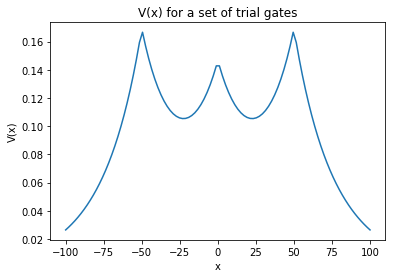

In [11]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
gate1 = {'peak' : 150e-3,'mean' : -50,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
gate2 = {'peak' : 100e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 50,'rho' : 5, 'h' : 50,'screen' : 25,'alpha' : 1.0}
trial_gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3}
    
V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

{'state': 1, 'current': 1.4888613810405126e-71, 'charge': (20,), 'cap_model': (array([ 19.78720032]), array([[ 0.00228669]])), 'tunnel_vec': array([  4.14745815e-05,   4.47272403e-05]), 'sensor': [0.4008391392138036]}
islands [array([29, 71])]
barriers [[18 29]
 [71 82]]
all_islands [[  0  18]
 [ 29  71]
 [ 82 100]]


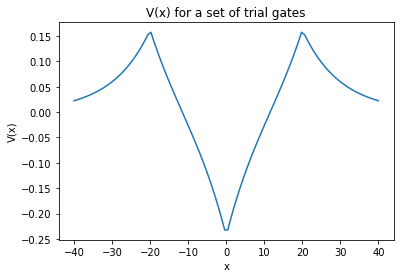

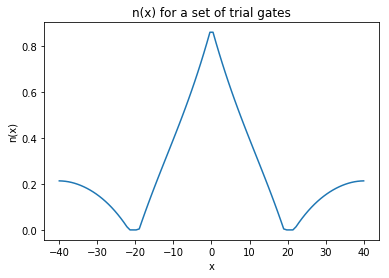

In [132]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

# trial potential profile
N_grid = 100
system_size = 80
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)

gate1 = {'peak' : 200e-3,'mean' : -20,'rho' : 5, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gate2 = {'peak' : -300e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gate3 = {'peak' : 200e-3,'mean' : 20,'rho' : 5, 'h' : 50,'screen' : 10,'alpha' : 1.0}
gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3}

V = potential_profile.calc_V(x,gates)
plt.figure(1)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 1e-2, 
           'gates' : gates,
           'sigma' : 3.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 2e0,
           'c_k' : 1e-3,
           'beta' : 1000,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 10.0,
           'V_L' : 100e-6,
           'V_R' : -100e-6,
           'short_circuit_current' : 1.0,
           'attempt_rate_coef' : 1,
           'sensors' : [(0,50)],
           'barrier_current' : 1.0,
           'sensor_gate_coeff' : 1e-1,
           }
K_mat = thomas_fermi.calc_K_mat(x,physics['K_0'],physics['sigma'])
physics['K_mat'] = K_mat
physics['bias'] = physics['V_L'] - physics['V_R']

tf = thomas_fermi.ThomasFermi(physics)
output = tf.output_wrapper()

print(output)
print("islands",tf.islands)
print("barriers",tf.barriers)
print("all_islands",tf.all_islands)

plt.figure(2)
plt.plot(x,tf.n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

# Testing of Random Single Dot script

In [236]:
import random_single_dot
import time
imp.reload(potential_profile)
imp.reload(thomas_fermi)
imp.reload(random_single_dot)

data_path = "/Users/sandesh/data_for_paper/single_dot_mac/"
for i in range(1):
    print(i)
    st = time.time()
    result = random_single_dot.calc_plunger_trace(512,data_path)
print(time.time()-st)

0
0.9702889919281006


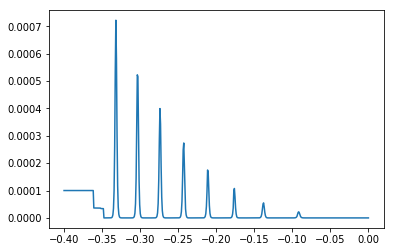

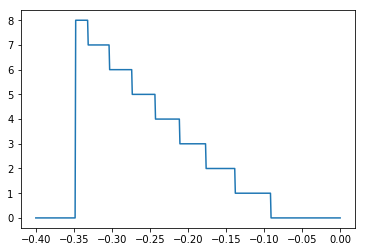

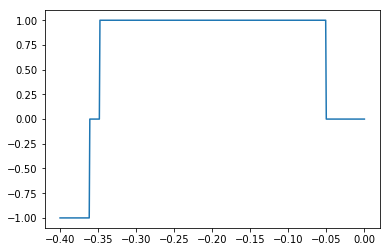

In [237]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]
state_vec = np.array([x['state'] for x in result['output']])
plt.figure(1)
plt.plot(V_P_vec,current_vec)
plt.figure(2)
plt.plot(V_P_vec,charge_vec)
plt.figure(3)
plt.plot(V_P_vec,state_vec)

## Single Dot Barrier map

In [194]:
import random_single_dot
imp.reload(random_single_dot)
imp.reload(thomas_fermi)
imp.reload(potential_profile)

N_v = 100
st = time.time()
res = random_single_dot.calc_barrier_map(N_v,V_p = -100e-3)
print("Total time",time.time()-st)

KeyError: 'gates'

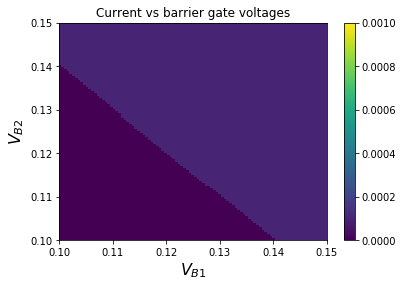

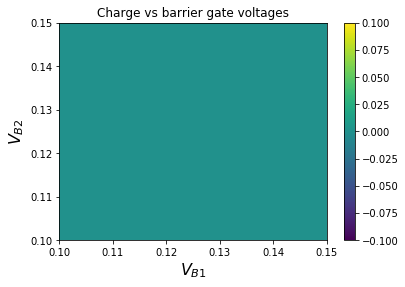

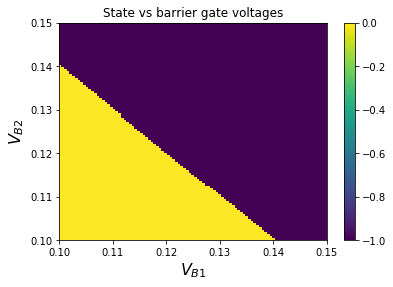

In [112]:
V_B1= np.array(res['V_B1_vec'])
V_B2= np.array(res['V_B2_vec'])
XX,YY = np.meshgrid(V_B1,V_B2)


current_vec = np.array([x['current'] for x in res['output']])
charge_vec = np.array([np.sum(x['charge']) for x in res['output']])
state_vec = np.array([x['state'] for x in res['output']])

plt.figure(1)
plt.pcolor(XX,YY,current_vec.reshape(N_v,N_v),vmax=1e-3)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,charge_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,state_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("State vs barrier gate voltages")
cbar = plt.colorbar()

## Single Dot Full map

In [142]:
import random_single_dot
imp.reload(random_single_dot)
imp.reload(thomas_fermi)
imp.reload(potential_profile)

N_v = 100
st = time.time()
res = random_single_dot.calc_full_map(N_v)
print("Total time",time.time()-st)

Total time 4191.871562004089


In [8]:
import glob
files = glob.glob("/Users/sandesh/data/quantum-ml/single_dot/*full_map*")
print(files)

['/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-014850.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-031743.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-033822.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-035951.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-042108.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-044158.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-101701.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-112744.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-130954.npy']


In [21]:
def load_full_map(file):
    res = np.load(file).item()
    V_B1= np.array(res['V_B1_vec'])
    V_P= np.array(res['V_P_vec'])
    V_B2= np.array(res['V_B2_vec'])
    XX,YY = np.meshgrid(V_B1,V_B2)

    N_v = len(V_P)
    current_vec = []
    charge_vec = []
    state_vec = []
    sensor_vec = []
    for ele in res['output']:
        current_vec.append(ele['current'])
        charge_vec.append(np.sum(ele['charge']))
        state_vec.append(ele['state'])
        sensor_vec.append(ele['sensor'])

    current_vec = np.array(current_vec).reshape(N_v,N_v,N_v)
    charge_vec = np.array(charge_vec).reshape(N_v,N_v,N_v)
    state_vec = np.array(state_vec).reshape(N_v,N_v,N_v)
    sensor_vec = np.array(sensor_vec).reshape(N_v,N_v,N_v,-1)
    return XX,YY,current_vec,charge_vec,state_vec,sensor_vec

In [22]:
%lprun -f load_full_map XX,YY,current_vec,charge_vec,state_vec,sensor_vec = load_full_map(files[-1])

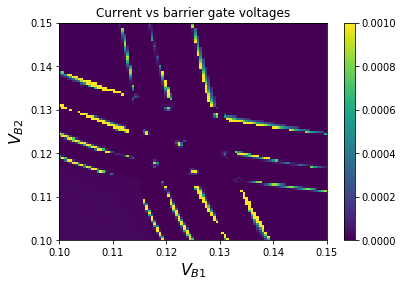

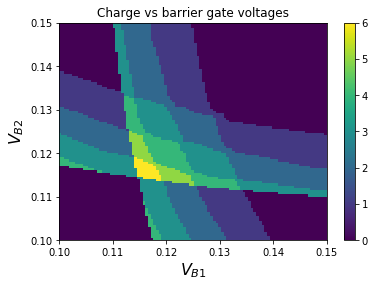

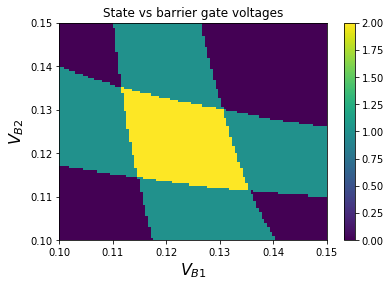

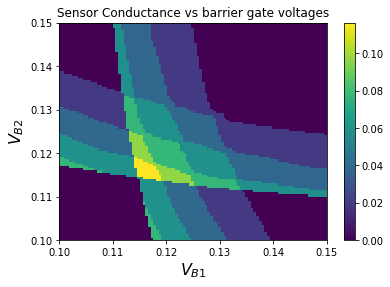

In [32]:
plunger_index = 99

plt.figure(1)
plt.pcolor(XX,YY,current_vec[:,plunger_index,:],vmax=1e-3)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Current vs barrier gate voltages")

plt.figure(2)
plt.pcolor(XX,YY,charge_vec[:,plunger_index,:])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Charge vs barrier gate voltages")

plt.figure(3)
plt.pcolor(XX,YY,state_vec[:,plunger_index,:])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("State vs barrier gate voltages")

plt.figure(4)
plt.pcolor(XX,YY,sensor_vec[:,plunger_index,:,0])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.colorbar()
plt.title("Sensor Conductance vs barrier gate voltages")

## Animation
Create a video of the full 3D space for a single dot.

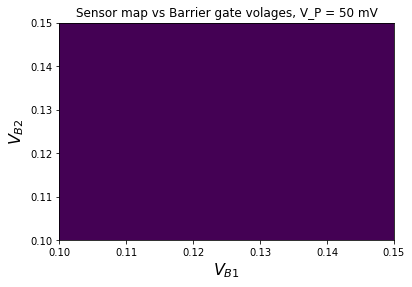

In [26]:
# animation
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='/usr/local/bin/ffmpeg'
fig, ax = plt.subplots(1,1)

def animate(i):
    line = ax.pcolor(XX,YY,np.gradient(sensor_vec[:,i,:,0])[0])
    ax.set_title(r'Sensor map vs Barrier gate volages, V_P = ' +  str(50 + i) + ' mV') 
    #line = ax[1].pcolor(XX,YY,charge_vec[:,i,:])
    #line = ax[2].pcolor(XX,YY,state_vec[:,i,:])
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line = ax.pcolor(XX,YY,np.gradient(sensor_vec[:,0,:,0])[0])
    #cbar_0 = plt.colorbar(line,ax=ax)
    ax.set_xlabel(r'$V_{B1}$',fontsize=16)
    ax.set_ylabel(r'$V_{B2}$',fontsize=16)
    ax.set_title(r'Sensor map vs Barrier gate volages, V_P = 50 mV')
    #cbar_0.set_label('Charge')
    
    #line = ax[1].pcolor(XX,YY,charge_vec[:,0,:])
    #cbar_1 = plt.colorbar(line,ax=ax[1])
    #ax[1].set_xlabel(r'$V_{B1}$',fontsize=16)
    #ax[1].set_ylabel(r'$V_{B2}$',fontsize=16)
    #ax[1].set_title(r'Charge map vs Barrier gate volages' + str(0))
    #cbar_1.set_label('Current')
    #
    #line = ax[2].pcolor(XX,YY,state_vec[:,0,:])
    #cbar_2 = plt.colorbar(line,ax=ax[2])
    #ax[2].set_xlabel(r'$V_{B1}$',fontsize=16)
    #ax[2].set_ylabel(r'$V_{B2}$',fontsize=16)
    #ax[2].set_title(r'State map vs Barrier gate volages' + str(0))
    #cbar_2.set_label('State')
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(100) , init_func=init,
                              interval=500, blit=False)

mywriter = animation.FFMpegWriter()
ani.save('single_dot_land_sensor_dd_2.mp4',writer=mywriter)

plt.show()

## Testing of the potential profile for 5 gate device

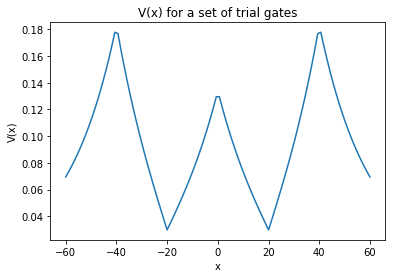

In [238]:
import potential_profile
N_grid = 100
system_size = 120
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)


# trial potential profile
gate1 = {'peak' : 200e-3,'mean' : -40,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate2 = {'peak' : -100e-3,'mean' : -20,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate4 = {'peak' : -100e-3,'mean' : 20,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate5 = {'peak' : 200e-3,'mean' : 40,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
trial_gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3, 'gate4' : gate4, 'gate5' : gate5}
    
V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class for 5 gate device

{'state': 2, 'current': 1.2661691501053269e-59, 'charge': (2, 2), 'cap_model': (array([ 2.00626164,  2.01156933]), array([[ 0.00267894,  0.00043287],
       [ 0.00043287,  0.00267317]])), 'tunnel_vec': array([  9.74725630e-07,   2.97853197e-04,   1.01790337e-06]), 'sensor': [0.085467118094282479]}
islands [array([25, 46]), array([54, 75])]
barriers [[ 6 25]
 [46 54]
 [75 94]]
all_islands [[  0   6]
 [ 25  46]
 [ 54  75]
 [ 94 100]]


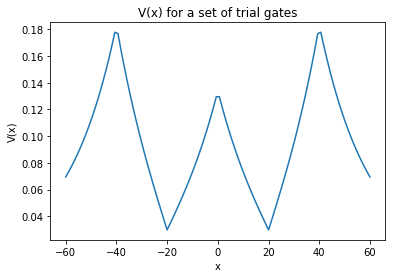

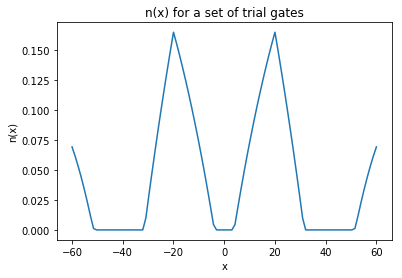

In [239]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

# trial potential profile
N_grid = 100
system_size = 120
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)


# trial potential profile
gate1 = {'peak' : 200e-3,'mean' : -40,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate2 = {'peak' : -100e-3,'mean' : -20,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate4 = {'peak' : -100e-3,'mean' : 20,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gate5 = {'peak' : 200e-3,'mean' : 40,'rho' : 5, 'h' : 50,'screen' : 20,'alpha' : 1.0}
gates = {'gate1' : gate1,'gate2' : gate2, 'gate3' : gate3, 'gate4' : gate4, 'gate5' : gate5}

V = potential_profile.calc_V(x,gates)
plt.figure(1)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'gates' : gates,
           'K_0' : 1e-2, 
           'sigma' : 3.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 2e0,
           'c_k' : 1e-3,
           'beta' : 1000,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 10.0,
           'V_L' : 100e-6,
           'V_R' : -100e-6,
           'short_circuit_current' : 1.0,
           'attempt_rate_coef' : 1,
           'sensors' : [(0,50)],
           'barrier_current' : 1.0,
           'sensor_gate_coeff' : 1e-1,
           }
K_mat = thomas_fermi.calc_K_mat(x,physics['K_0'],physics['sigma'])
physics['K_mat'] = K_mat
physics['bias'] = physics['V_L'] - physics['V_R']

tf = thomas_fermi.ThomasFermi(physics)
output = tf.output_wrapper()

print(output)
print("islands",tf.islands)
print("barriers",tf.barriers)
print("all_islands",tf.all_islands)

plt.figure(2)
plt.plot(x,tf.n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

# Double Dot Plunger Map

In [293]:
import random_double_dot
imp.reload(random_double_dot)
imp.reload(thomas_fermi)
imp.reload(potential_profile)

N_v = 100
st = time.time()
data_path = "/Users/sandesh/data_for_paper/double_dot_mac/"
for i in range(100):
    print(i)
    res = random_double_dot.calc_plunger_map(N_v,data_path)
print("Total time",time.time()-st)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Total time 2615.184839963913


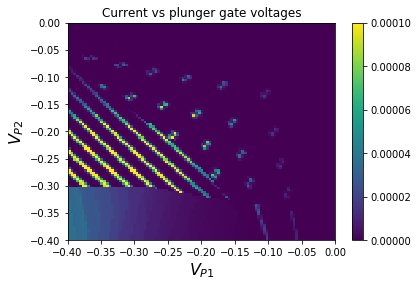

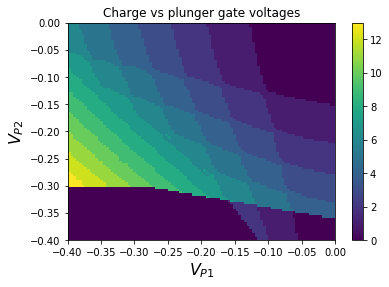

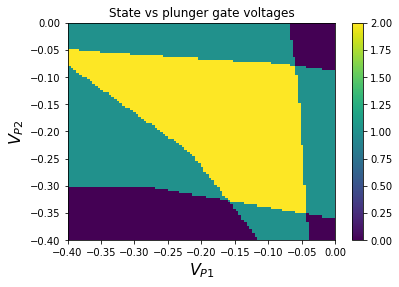

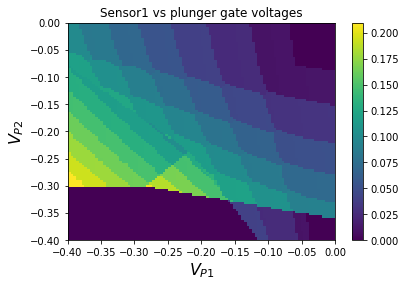

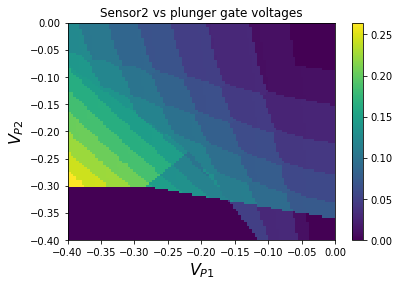

In [296]:
V_P1= np.array(res['V_P1_vec'])
V_P2= np.array(res['V_P2_vec'])
XX,YY = np.meshgrid(V_P1,V_P2)


current_vec = np.array([x['current'] for x in res['output']]).reshape(N_v,N_v)
charge_vec = np.array([np.sum(x['charge']) for x in res['output']]).reshape(N_v,N_v)
state_vec = np.array([x['state'] for x in res['output']]).reshape(N_v,N_v)
sensor_vec = np.array([x['sensor'] for x in res['output']]).reshape(N_v,N_v,-1)

plt.figure(1)
plt.pcolor(XX,YY,current_vec,vmax=1e-4)
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.colorbar()
plt.title("Current vs plunger gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,charge_vec)
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.title("Charge vs plunger gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,state_vec)
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.title("State vs plunger gate voltages")
cbar = plt.colorbar()
plt.figure(4)
plt.pcolor(XX,YY,sensor_vec[:,:,0])
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.title("Sensor1 vs plunger gate voltages")
cbar = plt.colorbar()
plt.figure(5)
plt.pcolor(XX,YY,sensor_vec[:,:,1])
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
plt.title("Sensor2 vs plunger gate voltages")
cbar = plt.colorbar()


### Differential Conductance

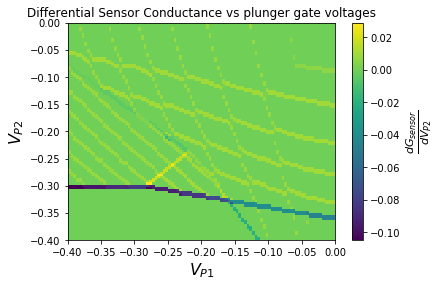

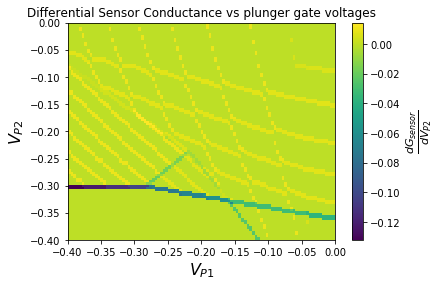

In [297]:
grad1 = np.gradient(sensor_vec[:,:,0])
grad2 = np.gradient(sensor_vec[:,:,1])

plt.figure(1)
plt.pcolor(XX,YY,grad1[0])
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
cbar1 = plt.colorbar()
cbar1.set_label(r"$\frac{dG_{sensor}}{dV_{P2}}$",fontsize=16)
plt.title("Differential Sensor Conductance vs plunger gate voltages")

plt.figure(2)
plt.pcolor(XX,YY,grad2[0])
plt.xlabel(r"$V_{P1}$",fontsize=16)
plt.ylabel(r"$V_{P2}$",fontsize=16)
cbar2 = plt.colorbar()
plt.title(r"Differential Sensor Conductance vs plunger gate voltages")
cbar2.set_label(r"$\frac{dG_{sensor}}{dV_{P2}}$",fontsize=16)